Based on https://www.tensorflow.org/text/tutorials/text_classification_rnn

# Reformatting Data

See code in Sequential Classifier 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import numpy as np
import pandas as pd
import random

In [3]:
def get_word_counts(text):
  return len(text.split())

In [12]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

# Twitter Classifier

info about using pandas for data input: https://www.tensorflow.org/tutorials/load_data/csv

Input Pipeline

In [13]:
batch_size = 64
seed = 42

train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/twitter/train/', 
    batch_size=batch_size)

Found 568 files belonging to 2 classes.


In [14]:
test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/twitter/test/', 
    batch_size=batch_size)

Found 144 files belonging to 2 classes.


In [15]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [16]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'to', 'covid19', 'of', 'in', 'a', 'for',
       'has', 'i', 'coronavirus', 'pandemic', 'are', 'this', 'is', 'we',
       'all', 'us'], dtype='<U19')

In [17]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [18]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [19]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [20]:
history = model.fit(train_ds, epochs=30,
                    validation_data=test_ds,
                    validation_steps=30)

Epoch 1/30
9/9 [==============================] - ETA: 0s - loss: 0.6921 - accuracy: 0.5000

9/9 [==============================] - 36s 3s/step - loss: 0.6921 - accuracy: 0.5000 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/30
9/9 [==============================] - 2s 100ms/step - loss: 0.6885 - accuracy: 0.5000
Epoch 3/30
9/9 [==============================] - 2s 101ms/step - loss: 0.6850 - accuracy: 0.5000
Epoch 4/30
9/9 [==============================] - 2s 107ms/step - loss: 0.6812 - accuracy: 0.5000
Epoch 5/30
9/9 [==============================] - 2s 99ms/step - loss: 0.6766 - accuracy: 0.5000
Epoch 6/30
9/9 [==============================] - 2s 174ms/step - loss: 0.6709 - accuracy: 0.5000
Epoch 7/30
9/9 [==============================] - 2s 121ms/step - loss: 0.6634 - accuracy: 0.5000
Epoch 8/30
9/9 [==============================] - 2s 105ms/step - loss: 0.6535 - accuracy: 0.5000
Epoch 9/30
9/9 [==============================] - 2s 100ms/step - loss: 0.6400 - accuracy: 0.5000
Epoch 10/30
9/9 [==============================] - 1s 98ms/step - loss: 0.6211 - accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

3/3 [==============================] - 0s 22ms/step - loss: 0.0150 - accuracy: 1.0000
Test Loss: 0.01496270950883627
Test Accuracy: 1.0


(0.0, 0.7247928756754846)

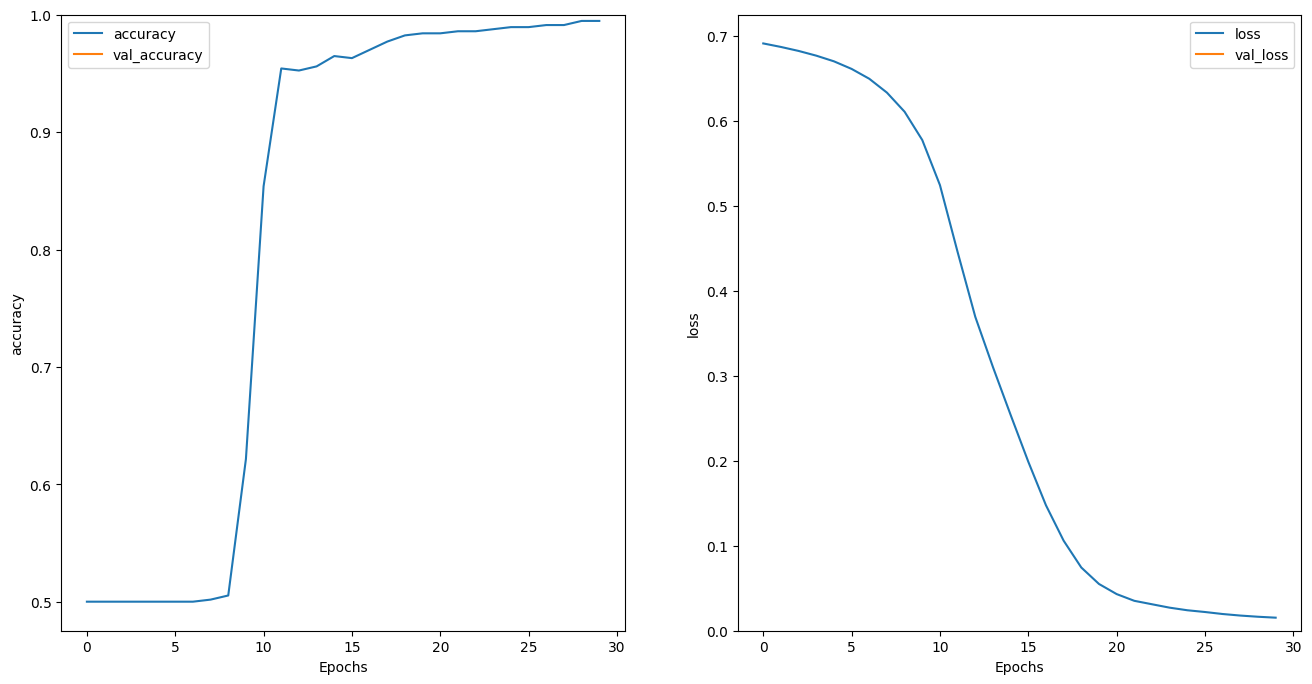

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# Reddit Classifier

Input Pipeline

In [ ]:
batch_size = 64
seed = 42

train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/reddit/train/', 
    batch_size=batch_size)

Found 612 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/reddit/test/', 
    batch_size=batch_size)

Found 154 files belonging to 2 classes.


In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'to', 'and', 'a', 'i', 'of', 'it', 'that',
       'you', 'in', 'is', 'for', 'was', 'im', 'with', 'its', 'but', 'be'],
      dtype='<U14')

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=30,
                    validation_data=test_ds,
                    validation_steps=30)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5000

10/10 [==============================] - 59s 5s/step - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 2/30
10/10 [==============================] - 3s 258ms/step - loss: 0.6910 - accuracy: 0.5000
Epoch 3/30
10/10 [==============================] - 3s 259ms/step - loss: 0.6895 - accuracy: 0.5000
Epoch 4/30
10/10 [==============================] - 4s 352ms/step - loss: 0.6877 - accuracy: 0.5000
Epoch 5/30
10/10 [==============================] - 4s 318ms/step - loss: 0.6853 - accuracy: 0.5000
Epoch 6/30
10/10 [==============================] - 3s 255ms/step - loss: 0.6821 - accuracy: 0.5000
Epoch 7/30
10/10 [==============================] - 3s 267ms/step - loss: 0.6775 - accuracy: 0.5000
Epoch 8/30
10/10 [==============================] - 5s 429ms/step - loss: 0.6707 - accuracy: 0.5000
Epoch 9/30
10/10 [==============================] - 3s 259ms/step - loss: 0.6603 - accuracy: 0.5000
Epoch 10/30
10/10 [==============================] - 3s 253ms/step - lo

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

3/3 [==============================] - 0s 63ms/step - loss: 0.2168 - accuracy: 0.9221
Test Loss: 0.21679583191871643
Test Accuracy: 0.9220778942108154


(0.0, 0.7235630508512259)

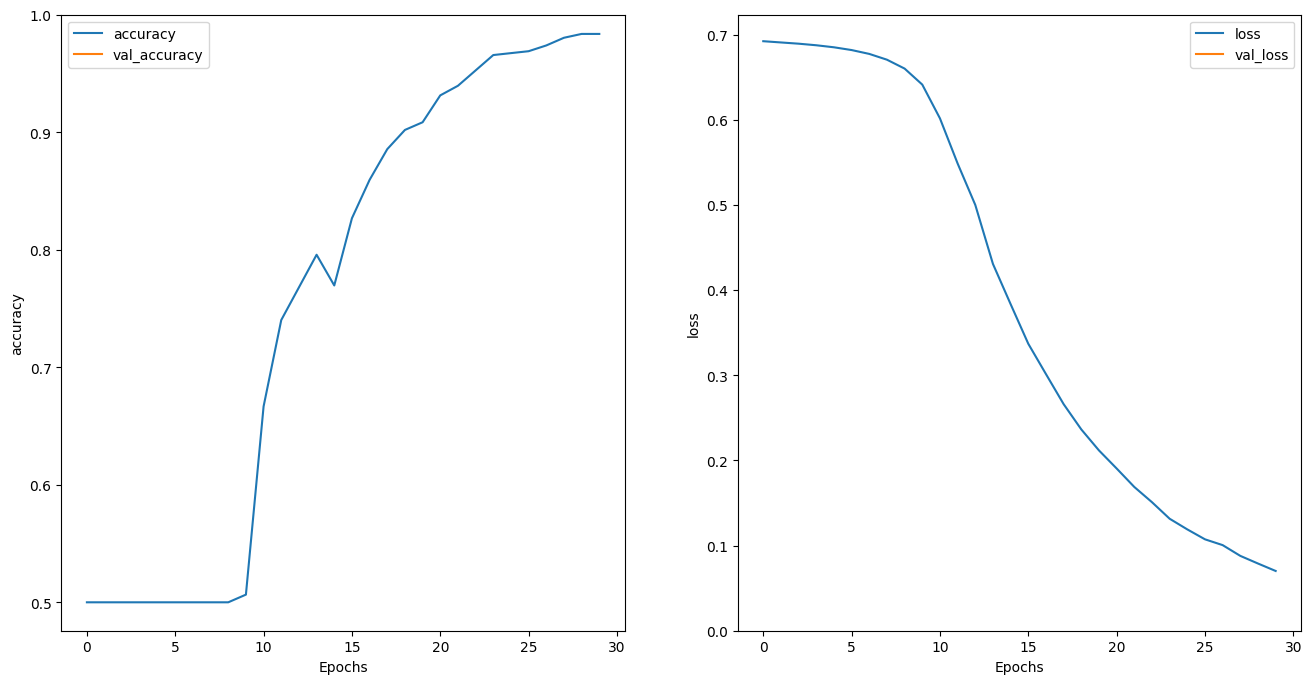

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# Abstract Classifier

Input Pipeline

In [ ]:
batch_size = 64
seed = 42

train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/abstracts/train/', 
    batch_size=batch_size)

Found 1206 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/abstracts/test/', 
    batch_size=batch_size)

Found 302 files belonging to 2 classes.


In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'of', 'and', 'a', 'to', 'in', 'for', 'is',
       'we', 'that', 'this', 'on', 'paper', 'with', 'learning',
       'proposed', 'approach', 'as'], dtype='<U15')

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=30,
                    validation_data=test_ds,
                    validation_steps=30)

Epoch 1/30
19/19 [==============================] - ETA: 0s - loss: 0.6899 - accuracy: 0.5000

19/19 [==============================] - 106s 5s/step - loss: 0.6899 - accuracy: 0.5000 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 12s 626ms/step - loss: 0.6829 - accuracy: 0.5000
Epoch 3/30
19/19 [==============================] - 11s 563ms/step - loss: 0.6731 - accuracy: 0.5000
Epoch 4/30
19/19 [==============================] - 12s 626ms/step - loss: 0.6572 - accuracy: 0.5000
Epoch 5/30
19/19 [==============================] - 12s 625ms/step - loss: 0.6238 - accuracy: 0.5033
Epoch 6/30
19/19 [==============================] - 11s 517ms/step - loss: 0.4960 - accuracy: 0.8914
Epoch 7/30
19/19 [==============================] - 12s 614ms/step - loss: 0.3434 - accuracy: 0.9245
Epoch 8/30
19/19 [==============================] - 11s 530ms/step - loss: 0.2284 - accuracy: 0.9237
Epoch 9/30
19/19 [==============================] - 12s 621ms/step - loss: 0.1705 - accuracy: 0.9386
Epoch 10/30
19/19 [==============================] - 11s 532ms

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

5/5 [==============================] - 1s 135ms/step - loss: 0.0750 - accuracy: 0.9768
Test Loss: 0.0749610885977745
Test Accuracy: 0.9768211841583252


(0.0, 0.723820913117379)

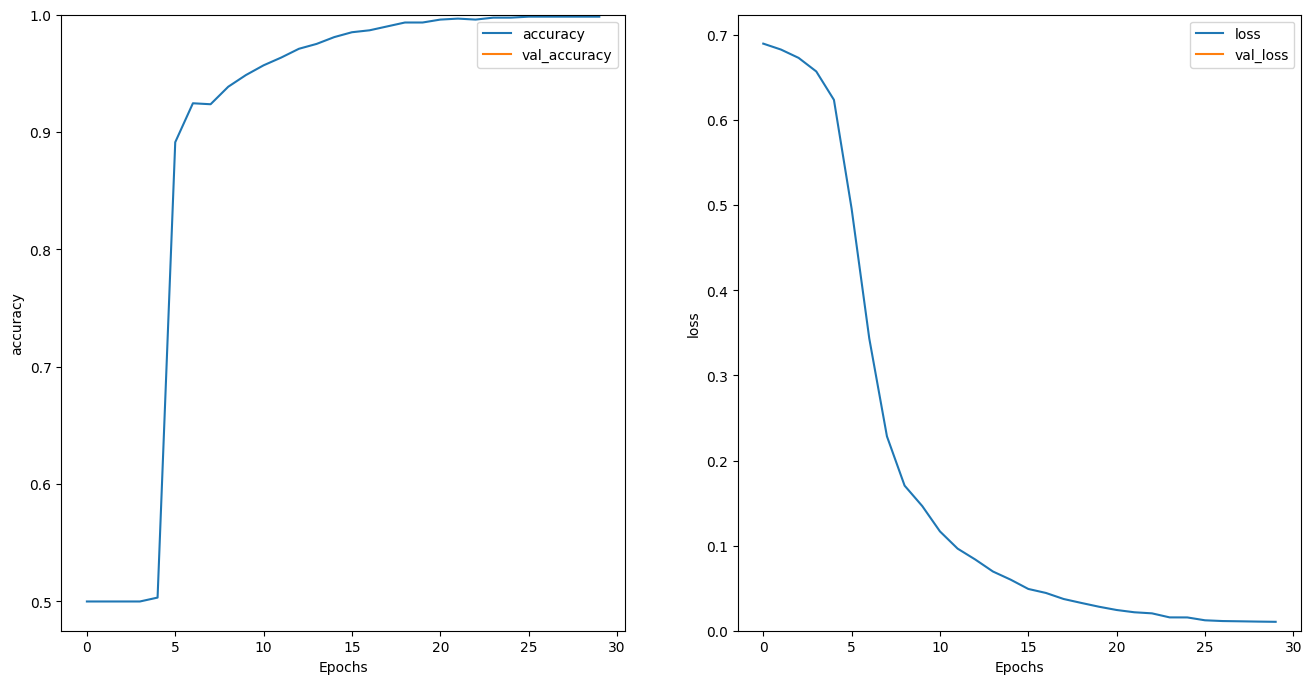

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# Essay Classifier

Input Pipeline

In [ ]:
batch_size = 64
seed = 42

train_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/essays/train/', 
    batch_size=batch_size)

Found 202 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.utils.text_dataset_from_directory(
    '/content/drive/MyDrive/CMSC742 Project/Datasets/essays/test/', 
    batch_size=batch_size)

Found 50 files belonging to 2 classes.


In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'to', 'of', 'a', 'in', 'is', 'that',
       'for', 'i', 'can', 'it', 'be', 'are', 'have', 'with', 'their',
       'people'], dtype='<U16')

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=30,
                    validation_data=test_ds,
                    validation_steps=30)

Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 0.6936 - accuracy: 0.5000

4/4 [==============================] - 28s 5s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
4/4 [==============================] - 6s 1s/step - loss: 0.6930 - accuracy: 0.5000
Epoch 3/30
4/4 [==============================] - 4s 895ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 4/30
4/4 [==============================] - 6s 1s/step - loss: 0.6920 - accuracy: 0.5000
Epoch 5/30
4/4 [==============================] - 4s 873ms/step - loss: 0.6916 - accuracy: 0.5000
Epoch 6/30
4/4 [==============================] - 6s 1s/step - loss: 0.6911 - accuracy: 0.5000
Epoch 7/30
4/4 [==============================] - 4s 878ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 8/30
4/4 [==============================] - 5s 1s/step - loss: 0.6902 - accuracy: 0.5000
Epoch 9/30
4/4 [==============================] - 4s 935ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 10/30
4/4 [==============================] - 6s 2s/step - loss: 0.6892 - accuracy: 0.5000
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

1/1 [==============================] - 0s 322ms/step - loss: 0.6650 - accuracy: 0.5000
Test Loss: 0.6650042533874512
Test Accuracy: 0.5


(0.0, 0.695745724439621)

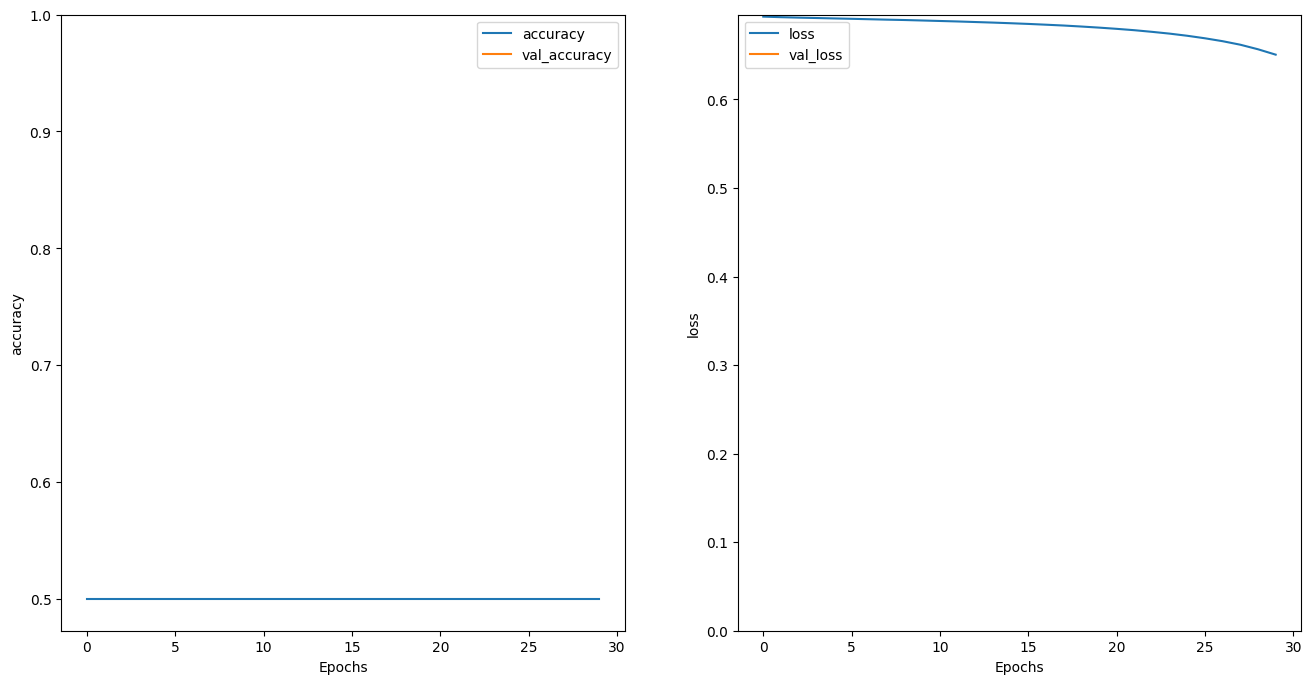

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)